<a href="https://colab.research.google.com/github/suhaib99/car_classification/blob/main/experimental/CarDataset_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
print("Open left tab and click files (files icon)")
print("Click drive and navigate to the zip file")
print("Click the 3 dots on file and copy path. Paste path here")
import zipfile
path_to_zip_file = input("File path: ")
# use dot . for cwd
# path_to_extract = input("Path of where you want to store: ")
path_to_extract = "dl4vision-winter-2023-a3"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(path_to_extract)
    # zip_ref.extractall(".") # to current directory

Open left tab and click files (files icon)
Click drive and navigate to the zip file
Click the 3 dots on file and copy path. Paste path here
File path: /content/drive/MyDrive/UC COURSES/599.6 - deep learning for vision/a3/Assignment 3 Dataset.zip


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/dl4vision-winter-2023-a3/train.csv")
print(df.shape)
print(df[:20].to_string())
print("------------")
print(df.id)
print("------------")
print(df.label)

(4135, 2)
              id  label
0    train/1.jpg      3
1    train/2.jpg     80
2    train/3.jpg     95
3    train/4.jpg     78
4    train/5.jpg     85
5    train/6.jpg     47
6    train/7.jpg     38
7    train/8.jpg     74
8    train/9.jpg      3
9   train/10.jpg     62
10  train/11.jpg     46
11  train/12.jpg     68
12  train/13.jpg     25
13  train/14.jpg     75
14  train/15.jpg     55
15  train/16.jpg     93
16  train/17.jpg     27
17  train/18.jpg     86
18  train/19.jpg     94
19  train/20.jpg      2
------------
0          train/1.jpg
1          train/2.jpg
2          train/3.jpg
3          train/4.jpg
4          train/5.jpg
             ...      
4130    train/4131.jpg
4131    train/4132.jpg
4132    train/4133.jpg
4133    train/4134.jpg
4134    train/4135.jpg
Name: id, Length: 4135, dtype: object
------------
0        3
1       80
2       95
3       78
4       85
        ..
4130    35
4131    74
4132     6
4133    67
4134     6
Name: label, Length: 4135, dtype: int64


In [5]:
paths = list(df.id)
labels = list(df.label)
paths_and_labels = list(zip(paths, labels))
print(type(paths[0]), type(labels[0]))
len(paths_and_labels), paths_and_labels[:50]

<class 'str'> <class 'int'>


(4135,
 [('train/1.jpg', 3),
  ('train/2.jpg', 80),
  ('train/3.jpg', 95),
  ('train/4.jpg', 78),
  ('train/5.jpg', 85),
  ('train/6.jpg', 47),
  ('train/7.jpg', 38),
  ('train/8.jpg', 74),
  ('train/9.jpg', 3),
  ('train/10.jpg', 62),
  ('train/11.jpg', 46),
  ('train/12.jpg', 68),
  ('train/13.jpg', 25),
  ('train/14.jpg', 75),
  ('train/15.jpg', 55),
  ('train/16.jpg', 93),
  ('train/17.jpg', 27),
  ('train/18.jpg', 86),
  ('train/19.jpg', 94),
  ('train/20.jpg', 2),
  ('train/21.jpg', 27),
  ('train/22.jpg', 14),
  ('train/23.jpg', 31),
  ('train/24.jpg', 80),
  ('train/25.jpg', 4),
  ('train/26.jpg', 86),
  ('train/27.jpg', 31),
  ('train/28.jpg', 42),
  ('train/29.jpg', 33),
  ('train/30.jpg', 54),
  ('train/31.jpg', 79),
  ('train/32.jpg', 90),
  ('train/33.jpg', 6),
  ('train/34.jpg', 18),
  ('train/35.jpg', 83),
  ('train/36.jpg', 95),
  ('train/37.jpg', 95),
  ('train/38.jpg', 48),
  ('train/39.jpg', 99),
  ('train/40.jpg', 32),
  ('train/41.jpg', 7),
  ('train/42.jpg', 38),


In [6]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from torch.utils.data import Dataset
import albumentations as A
import math

from PIL import Image

In [7]:
class CarDataset(Dataset):
  def __init__(self, csv_path: str,transform=None, ext=".jpg"):
    """
      csv_path: path of the csv file
      assume root path of dataset is the parent folder of csv_path
    """
    parent_dir = os.path.basename(os.path.dirname(csv_path))
    self.root = parent_dir

    df = pd.read_csv(csv_path)
    self.paths = list(map(lambda img_path: os.path.join(self.root, img_path), list(df.id)))
    self.labels = list(df.label)

    assert len(self.paths) == len(self.labels), "Number of image paths and labels should be equal"

    self.transform = transform if transform is not None else lambda same: same

  def __len__(self):
    return len(self.labels)
  
  def __getitem__(self,i):
    if i < 0 or i >= len(self.labels): return None
    label = self.labels[i]
    path = self.paths[i]
    # read the image
    image = Image.open(path)
    return self.transform(image), label
  

4135 2


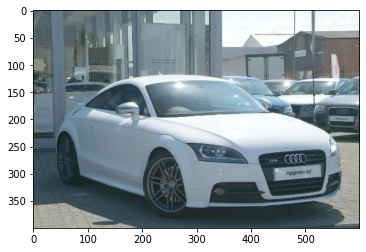

In [8]:
train_dataset = CarDataset(csv_path = "/content/dl4vision-winter-2023-a3/train.csv")
print(len(train_dataset), len(train_dataset[0]))
plt.imshow(train_dataset[0][0])